<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_11/b)_Gradient_Boost_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [6]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [8]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import time

# Dictionary to store results
results = {}

In [9]:
# Helper function to train and evaluate models
def train_and_evaluate_regressor(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Training Time (s)': training_time,
    }

In [10]:
# Initialize models
models = {
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

In [11]:
# Train and evaluate each model
for name, model in models.items():
    train_and_evaluate_regressor(model, X_train, y_train, X_test, y_test, name)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

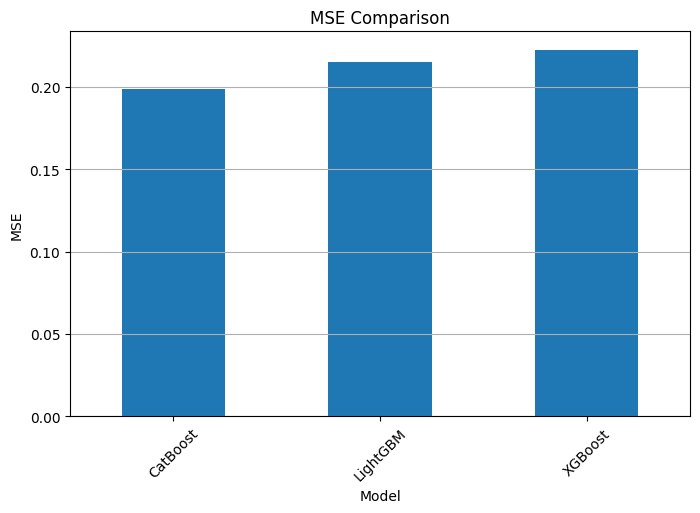

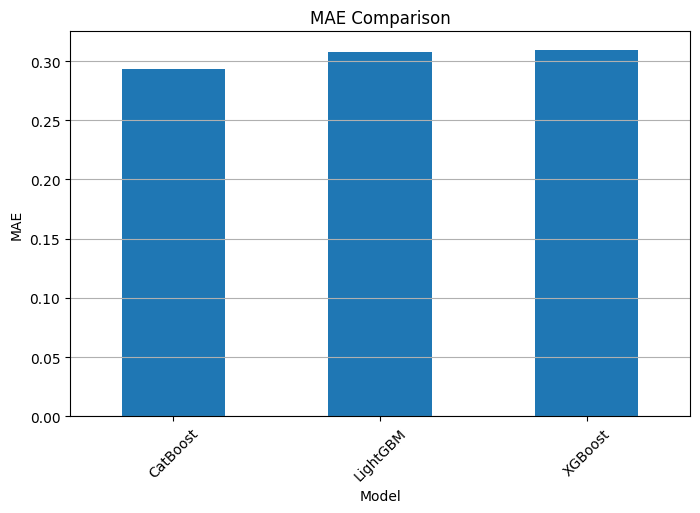

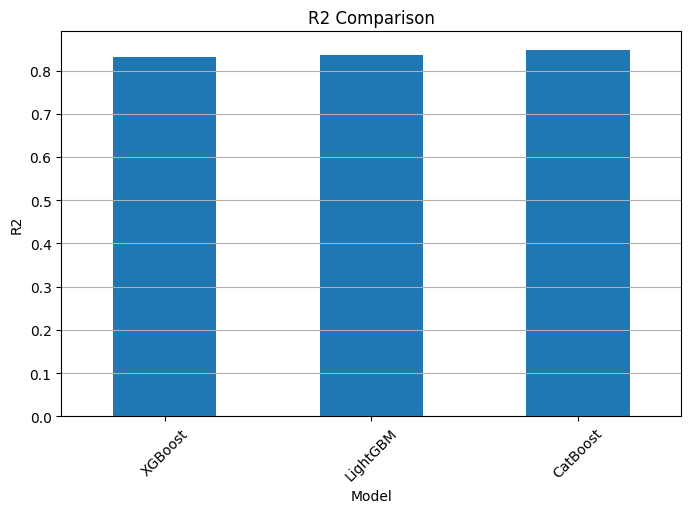

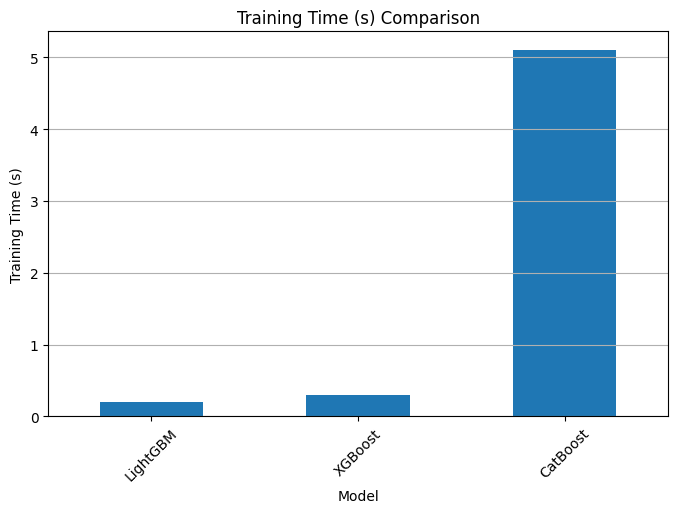

               MSE       MAE        R2  Training Time (s)
XGBoost   0.222590  0.309573  0.830137           0.299197
LightGBM  0.214848  0.307755  0.836045           0.201179
CatBoost  0.198922  0.292955  0.848198           5.107566


In [14]:
# Visualization
metrics = ['MSE', 'MAE', 'R2', 'Training Time (s)']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    results_df[metric].sort_values().plot(kind='bar', title=f"{metric} Comparison", ylabel=metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Display tabular results
print(results_df)
